# Insurance Charges Prediction Project

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Load the Dataset

In [21]:
Data = pd.read_csv("/Users/sajadbastami/Desktop/Organized_Folders/Data_science/projects/1/insurance.csv")
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Dataset Overview

In [ ]:
Data.info()
Data.describe()

In [ ]:
plt.scatter(Data['age'], Data['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

In [ ]:
np.sum(Data.duplicated())

In [ ]:
Data.drop_duplicates(inplace=True)

In [ ]:
np.sum(Data.duplicated())

Exploratory Data Analysis (EDA)
    Distribution of Target Variable (Charges)

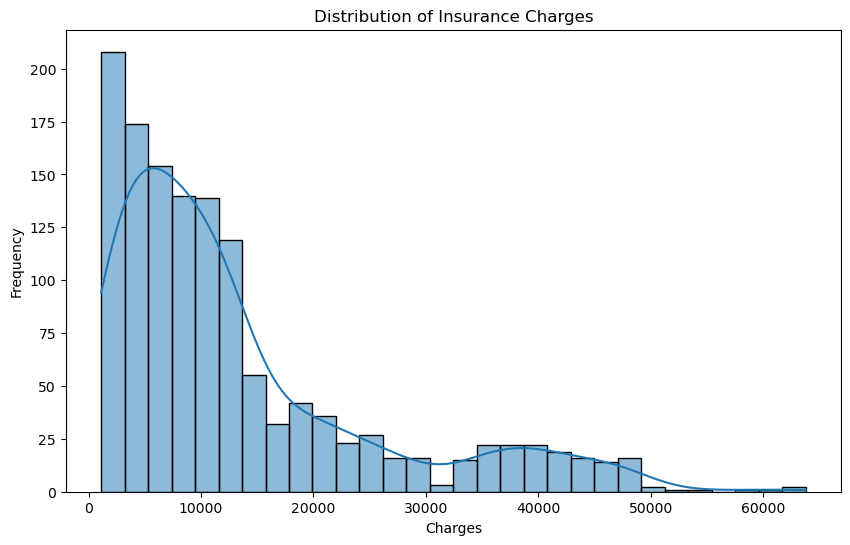

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(Data['charges'], bins=30, kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

Boxplot of Numerical Features

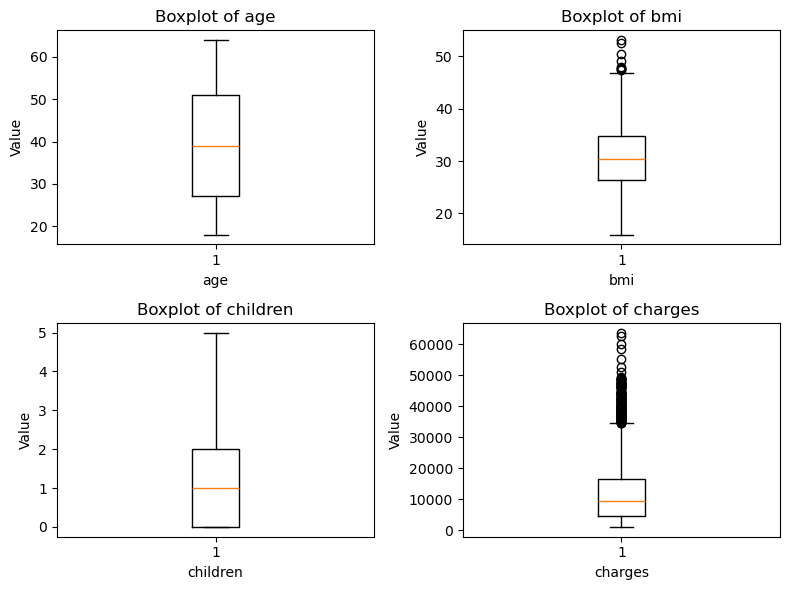

In [37]:
numeric_cols = ["age", "bmi", "children", "charges"]
plt.figure(figsize=(8, 6))
for i, col in enumerate(numeric_cols,1):    
    plt.subplot(2, 2, i)
    plt.boxplot(Data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()          

Feature and Target Separation

In [36]:
x = Data.drop("charges", axis=1)
y = Data["charges"]

Data preprocessing
    Define Numerical and Categorical Features

In [35]:
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

Create Preprocessing Pipeline

In [34]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])  

Train-Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

Define Machin Learning Models

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

Model Training and Evaluation

In [38]:
results = [ ]
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": model_name,
        "MSE": mse,
        "MAE": mae,
        "R2 Score": r2
    })  

Model Performance Comparison

In [39]:
results_df = pd.DataFrame(results,
                          columns=["Model"
                                   , "MSE"
                                   , "MAE"
                                   , "R2 Score"])
results_df

,Model,MSE,MAE,R2 Score
0,Linear Regression,3.547802e+07,4177.045561,0.806929
1,K-Nearest Neighbors,6.500708e+07,4496.305289,0.646232
2,Decision Tree,3.495303e+07,2804.811633,0.809786
3,Random Forest,2.237258e+07,2663.328798,0.878249


Feature Importance (Random Forest)

In [40]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(n_estimators=100, random_state=42))])
rf_pipeline.fit(X_train, y_train)
new_data = pd.DataFrame({
    'age': [40],
    'sex': ['male'],
    'bmi': [25.0],
    'children': [2],
    'smoker': ['no'],
    'region': ['northwest']
})
predicted_charge = rf_pipeline.predict(new_data)
print(f"Predicted Insurance Charge: ${predicted_charge[0]:.2f}")        

Predicted Insurance Charge: $7139.46


In [41]:
feature_names_num = numeric_features + list(rf_pipeline.named_steps['preprocessor']
                                            .transformers_[1][1]
                                            .get_feature_names_out(categorical_features))
importances = rf_pipeline.named_steps['model'].feature_importances_
feature_importances = pd.Series(importances, index=feature_names_num).sort_values(ascending=False)     

(Optional) Decision Tree Visualization

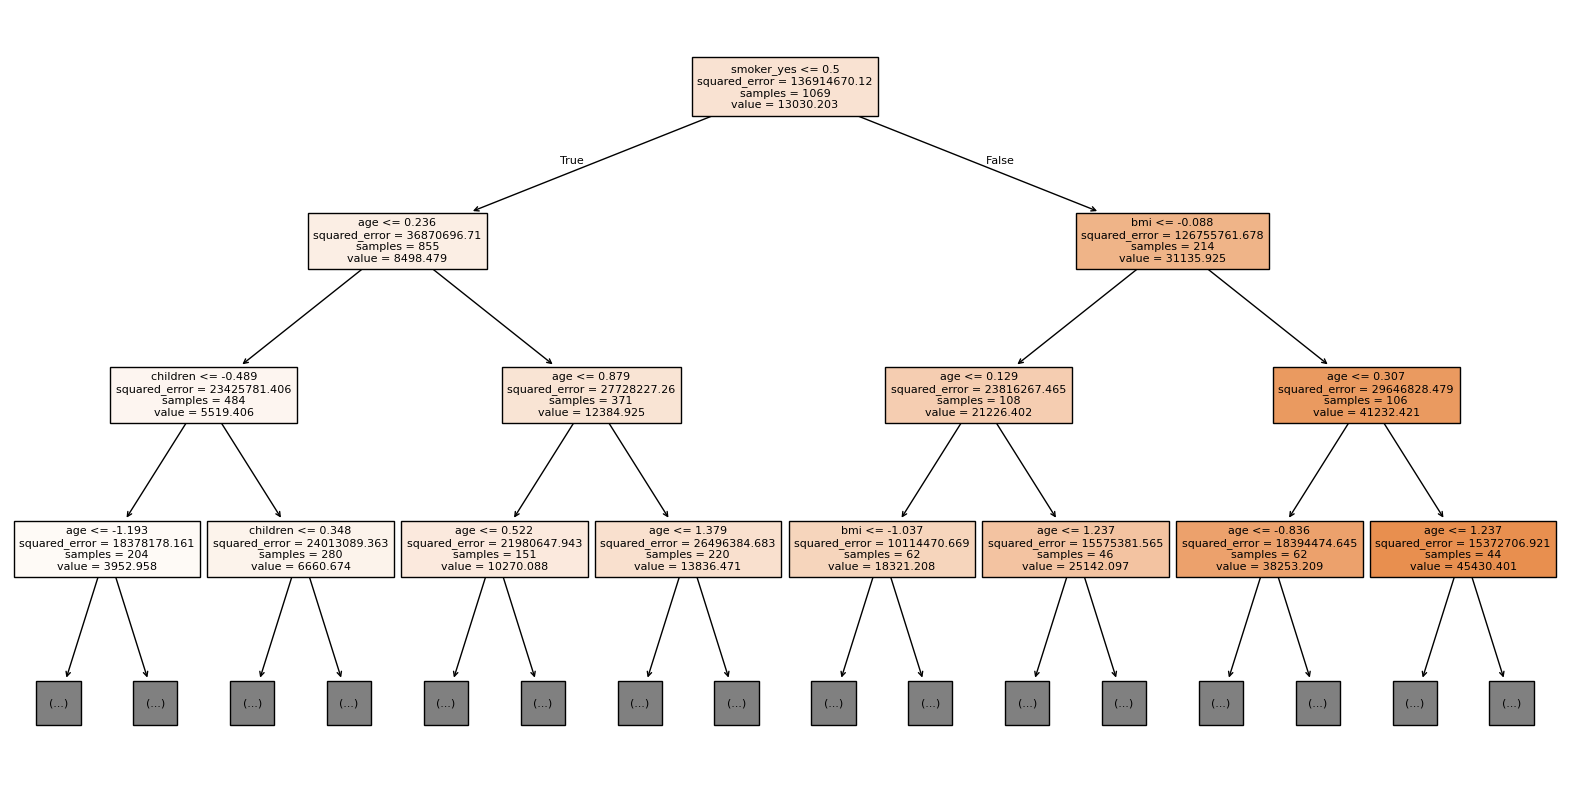

In [48]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    dt_pipe.named_steps['model'],
    filled=True,
    feature_names=feature_names,  # use the feature_names list defined earlier
    max_depth=3,
    fontsize=8
)
plt.show()

In [43]:
from sklearn.tree import DecisionTreeRegressor

dt_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(
        random_state=42,
        max_depth=5,        # جلوگیری از overfitting
        min_samples_split=10
    ))
])

dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model',
                 DecisionTreeRegressor(max_depth=5, min_samples_split=10,
                                       random_state=42))])

In [44]:
y_pred_dt = dt_pipe.predict(X_test)

In [26]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print(f"MSE  : {mse_dt:.2f}")
print(f"RMSE : {rmse_dt:.2f}")
print(f"MAE  : {mae_dt:.2f}")
print(f"R2   : {r2_dt:.3f}")

Decision Tree Results:
MSE  : 19461664.32
RMSE : 4411.54
MAE  : 2656.84
R2   : 0.894


In [45]:
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [46]:
feature_names = (
    numeric_features +
    list(rf_pipe.named_steps['preprocessor']
         .transformers_[1][1]
         .get_feature_names_out(categorical_features))
)

importances = rf_pipe.named_steps['model'].feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp

smoker_yes          0.600777
bmi                 0.216088
age                 0.135726
children            0.022938
sex_male            0.007076
region_northwest    0.006779
region_southeast    0.006045
region_southwest    0.004570
dtype: float64